In [153]:
import numpy as np
from collections import defaultdict
import seaborn as sns
from matplotlib.patches import Patch

from Testing import Test
from Blackjack.Environment import BJEnvironment
import matplotlib.pyplot as plt

VERSION = 3
COMPLETEDVERSION = 1
EPOCH = 5

In [154]:
def get_obs(player_sum, dealer_card, usable_ace):
    # player_sum, dealer_sum, usable_ace, split_pos, double_pos, prob_21, game_state
    has_double = True
    prob_21 = int((100*(21-player_sum)/21)/10)
    game_state = 0
    has_split = player_sum % 2 == 0 and player_sum > 2
    state = np.array(
        [
            player_sum,
            dealer_card,
            usable_ace,
            has_split,
            has_double,
            prob_21,
            game_state,
        ]
    )
    state = state.astype(np.uint8)
    state = np.reshape(state, [1, 7])
    return state


def create_grid(model, usable_ace = False):
    policy = defaultdict(int)
    
    for cardP in range(4,22):
        for cardD in range(1,11):
            obs = get_obs(cardP, cardD, usable_ace)
            obs = np.reshape(obs, [1, 7])
            policy[(cardP, cardD, usable_ace)] = model.predict(obs)
            
    player_count, dealer_count = np.meshgrid(
        # players count, dealers face-up card
        np.arange(4, 22),
        np.arange(1, 11),
    )

    policy_grid = np.apply_along_axis(
        lambda obs: np.argmax(policy[(obs[0], obs[1], usable_ace)]),
        axis=2,
        arr=np.dstack([player_count, dealer_count]),
    )
    return policy_grid

def create_plots(policy_grid, title:str):
    fig = plt.figure(figsize=plt.figaspect(0.4))
    fig.suptitle(title, fontsize=16)
    
    fig.add_subplot(1,2,2)
    ax2 = sns.heatmap(policy_grid, linewidth=0, annot=True, cmap="Accent_r", cbar=False)
    ax2.set_title(f"Policy: {title}")
    ax2.set_xlabel("Player sum")
    ax2.set_ylabel("Dealer showing")
    ax2.set_xticklabels(range(4,22))
    ax2.set_yticklabels(list(range(1,11)),fontsize=12)
    
    legend_elements = [
        Patch(facecolor="black", edgecolor="black", label="Hit"),
        Patch(facecolor="red", edgecolor="black", label="Stand"),
        Patch(facecolor="orange", edgecolor="black", label="Split"),
        Patch(facecolor="green", edgecolor="black", label="Double")
    ]
    ax2.legend(handles=legend_elements,bbox_to_anchor=(1.3,1))
    return fig

In [155]:
env = BJEnvironment()
test = Test()

#test.ModelClass.loadCheckpoint(VERSION, COMPLETEDVERSION, EPOCH)
test.ModelClass.loadModel(VERSION, COMPLETEDVERSION)

print(test.ModelClass.model.get_weights())
obs = env.observation_space.sample()
obs = np.reshape(obs, [1, env.state_size])
print(obs)
print(test.ModelClass.model.predict(obs))

test.ModelClass.predict(obs)

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_94 (Dense)            (None, 128)               1024      
                                                                 
 dense_95 (Dense)            (None, 4)                 516       
                                                                 
Total params: 1540 (6.02 KB)
Trainable params: 1540 (6.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
[array([[-7.73986056e-02,  5.70456646e-02, -1.41697064e-01,
         1.71721756e-01,  1.00998335e-01, -1.84071928e-01,
         2.45627109e-03,  1.07055437e-02, -1.58079505e-01,
        -8.95153284e-02,  3.36172543e-02, -4.51551676e-02,
        -1.51755109e-01,  6.92857087e-01, -4.49426025e-02,
         9.28172693e-02,  3.90757114e-01, -1.14405535e-01,
        -4.35999334e-02, -1.82283834e-01, -7.44205806e-03,
   

3

In [156]:
policy_grids_nA = create_grid(test.ModelClass.model, False)
policy_grids = create_grid(test.ModelClass.model, True)

1/1 [==============================] - 0s 8ms/step


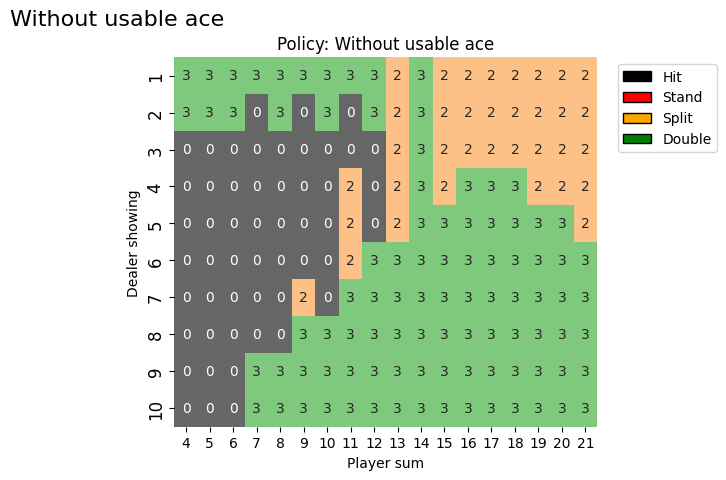

In [157]:
fig1 = create_plots(policy_grids_nA, title="Without usable ace")

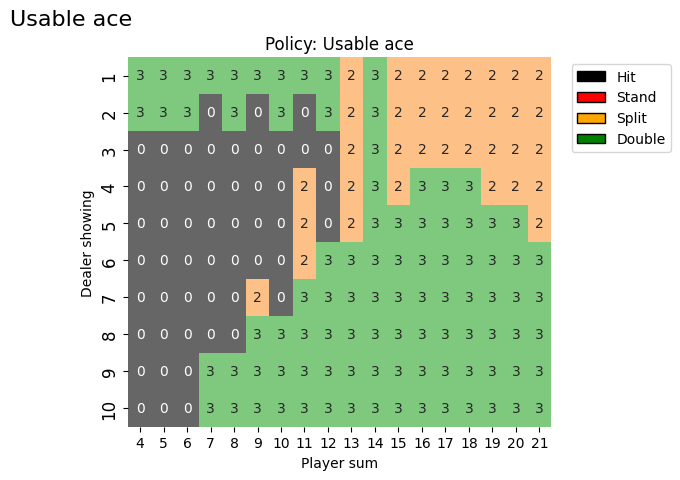

In [158]:
fig2 = create_plots(policy_grids, title="Usable ace")